<a href="https://colab.research.google.com/github/prissyyy/Studi-Independen/blob/main/Project-2.3_Credition-Prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selasa, 26 Oktober 2021 (Saat materi AI Chatbot in NLP)

#PREDIKSI 

In [ ]:
# Read the data
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/konsumen.csv', sep=';')
df

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI


# Tentang Dataset
Secara sekilas, dataset ini adalah data mengenai penjualan motor yang mencakup informasi mengenai motor yang dijual serta informasi mengenai pembeli. Maka akan dianalisis bagaimana cara meningkatkan penjualan motor yang ada serta meningkatkan pembayaran melalui credit.

Hal-hal yang ingin dijawab pada analisis data ini adalah:
- Motor apa yang paling banyak dibeli
- Target konsumen baru, dengan cara menganalisis karateristik orang-orang yang sudah melakukan pembelian motor (mencakup usia, tempat tinggal, sistem pembayaran, pekerjaan, gaji, pendidikan, apakah pernah memiliki motor, dan tujuan penggunaan motor)
- Kapan waktu yang tepat untuk melakukan promosi (dengan melihat kapan konsumen paling sering membeli motor).

## Pre-Processing
Data yang ada ternyata sangat besar. Akan dianalisis dulu variabel-variabel apa saja yang ada beserta melihat apakah ada duplikasi data dan nilai null.

In [ ]:
# Memunculkan informasi terkait data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SALES DATE              18616 non-null  object 
 1   TYPE MOTOR              18616 non-null  object 
 2   COLOR                   18616 non-null  object 
 3   KODE CUSTOMER           18616 non-null  object 
 4   JENIS KELAMIN           18616 non-null  object 
 5   TANGGAL LAHIR           18616 non-null  object 
 6   KECAMATAN SURAT         18616 non-null  object 
 7   KOTA SURAT              18616 non-null  object 
 8   PROPINSI                18616 non-null  object 
 9   STATUS RUMAH            18616 non-null  object 
 10  JENIS PENJUALAN STNK    18616 non-null  object 
 11  JENIS PENJUALAN SSU     18616 non-null  object 
 12  BESAR DP                10928 non-null  float64
 13  BESAR CICILAN           10928 non-null  float64
 14  LAMA CICILAN            10928 non-null

Dari info diatas, dapat diketahui ada nilai null pada variabel "BESAR DP", "BESAR CICILAN", "LAMA CICILAN", serta "KETERANGAN". Diekspektasi nilai null untuk variabel "BESAR DP", "BESAR CICILAN", dan "LAMA CICILAN" dikarenakan pembeli tersebut tidak mencicil motor yang dibeli. Sedangkan untuk variabel "KETERANGAN" jika dilihat pada dataset hanya melambangkan kepribadian dari pembeli. Karena nilai null pada variabel "KETERANGAN" melebihi 50%, maka variabel "KETERANGAN" tidak akan diikutkan dalam analisis.



In [ ]:
# Mengeliminasi variabel "KETERANGAN"
df = df.drop(["KETERANGAN"], axis=1)

In [ ]:
# Informasi dataset setelah keterangan didrop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SALES DATE              18616 non-null  object 
 1   TYPE MOTOR              18616 non-null  object 
 2   COLOR                   18616 non-null  object 
 3   KODE CUSTOMER           18616 non-null  object 
 4   JENIS KELAMIN           18616 non-null  object 
 5   TANGGAL LAHIR           18616 non-null  object 
 6   KECAMATAN SURAT         18616 non-null  object 
 7   KOTA SURAT              18616 non-null  object 
 8   PROPINSI                18616 non-null  object 
 9   STATUS RUMAH            18616 non-null  object 
 10  JENIS PENJUALAN STNK    18616 non-null  object 
 11  JENIS PENJUALAN SSU     18616 non-null  object 
 12  BESAR DP                10928 non-null  float64
 13  BESAR CICILAN           10928 non-null  float64
 14  LAMA CICILAN            10928 non-null

Sekarang akan dianalisis motor apa yang dibeli dengan credit oleh pembali.

In [ ]:
df_motorcredit = df[["TYPE MOTOR", "JENIS PENJUALAN STNK"]][df["JENIS PENJUALAN STNK"]=="CREDIT"]
percent_credit = len(df_motorcredit)/len(df)*100
print(f"Jumlah motor yang dikredit adalah {len(df_motorcredit)} dari {len(df)}")
print(f"yaitu {percent_credit} % dari total transaksi\n")

Jumlah motor yang dikredit adalah 11266 dari 18616
yaitu 60.51783412118608 % dari total transaksi



In [ ]:
# Ingin dimiliki variabel usia yang diambil dari tahun lahir
# Variabel "TANGGAL LAHIR" dipisah sehingga dimiliki tanggal, bulan, dan tahun lahir masing-masing dalam bentuk integer pada kolom-kolom terpisah
df[df.columns[5]] = df[df.columns[5]].replace('/', ' ', regex=True).astype(object)
df[['Tanggal lahir', 'Bulan lahir', 'Tahun lahir']] = df["TANGGAL LAHIR"].str.split(' ', 2, expand=True).astype(int)

## Membuat Dataset X dan Y

In [ ]:
# Mencantumkan variabel apa saja yang digunakan untuk dataset X dan y
X_variable = ["TYPE MOTOR", "COLOR", "JENIS KELAMIN", "Tahun lahir", "STATUS RUMAH", "PEKERJAAN", "PENGELUARAN", "MERK MOTOR SBLMNYA", "TYPE MOTOR SBLMNYA", "SMH DIGUNAKAN UNTUK", "YG MENGGUNAKAN SMH", "HOBI"]
y_variable = ["JENIS PENJUALAN STNK"]

# Membuat dataset X dan y
X = df[X_variable]
y = df[y_variable]

# Mengubah data categorical menjadi label
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# Dataset X
for column in X.columns:
  X[column] = LE.fit_transform(X[column])
# Dataset y
y = LE.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

,TYPE MOTOR,COLOR,JENIS KELAMIN,Tahun lahir,STATUS RUMAH,PEKERJAAN,PENGELUARAN,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI
0,30,5,0,28,1,0,4,1,0,1,3,0
1,30,5,0,30,1,9,5,1,3,1,3,0
2,30,5,0,56,0,4,2,1,3,1,3,0
3,30,5,0,41,1,9,2,1,0,5,3,20
4,30,5,0,54,1,4,2,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18611,15,5,1,42,1,10,4,0,1,1,3,34
18612,14,5,0,52,2,9,2,5,0,4,2,25
18613,14,11,0,56,0,9,6,1,2,1,3,0
18614,31,2,0,50,0,9,4,1,0,1,3,20


In [ ]:
X[column]

0         0
1         0
2         0
3        20
4         0
         ..
18611    34
18612    25
18613     0
18614    20
18615    28
Name: HOBI, Length: 18616, dtype: int64

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

No handles with labels found to put in legend.


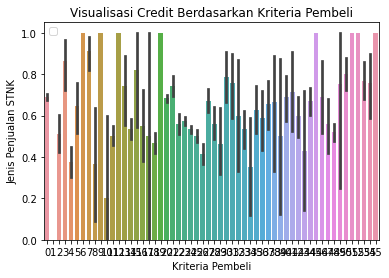

In [ ]:
# Visualisasi setelah data diubah ke numerik
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=X[column], y=y)
# Add labels to your graph
plt.xlabel("Kriteria Pembeli")
plt.ylabel("Jenis Penjualan STNK")
plt.title("Visualisasi Credit Berdasarkan Kriteria Pembeli")
plt.legend()
plt.show()

## Modelling: Random Forest

In [ ]:
# import algoritma Random Forest 
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"Akurasi Random Forrest: {accuracy_score(y_test, y_pred_rf)}")

Akurasi Random Forrest: 0.8373442200257842


Model yang dibuat memiliki akurasi 82.7% untuk memprediksi apakah pembeli akan menggunakan pembayaran CREDIT untuk membeli motor dari variabel: "TYPE MOTOR", "COLOR", "JENIS KELAMIN", "Tahun lahir", "STATUS RUMAH", "PEKERJAAN", "PENGELUARAN", "MERK MOTOR SBLMNYA", "TYPE MOTOR SBLMNYA", "SMH DIGUNAKAN UNTUK", "YG MENGGUNAKAN SMH", dan "HOBI".<br><br>

Maka, bisa dilakukan pengambilan data kustomer baru terkait variabel-variabel tersebut dan kemudian model dapat memprediksi apakah kustomer baru tersebut memiliki kecenderungan untuk membayar dengan CREDIT.



In [ ]:
# Modeling Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
nb_clf = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = nb_clf.fit(X_train, y_train)
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Akurasi Naive Bayes :", metrics.accuracy_score(y_test, y_pred))

Akurasi Naive Bayes : 0.6100128921357971


In [ ]:
# Modeling Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Logistic Regression
lr_clf = LogisticRegression()
# Mencocokan model dengan data training pada fungsi klasifikasi Logistic Regression
lr_clf.fit(X_train,y_train)
# Menentukan hasil prediksi dari x_test
y_pred = lr_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Akurasi Logistic Regression :", metrics.accuracy_score(y_test, y_pred))

Akurasi Logistic Regression : 0.6121615814353244


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Modeling KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Mengaktifkan/memanggil/membuat fungsi klasifikasi KNN
knn_clf = KNeighborsClassifier(n_neighbors = 2)
# Mencocokan model dengan data training pada fungsi klasifikasi KNN
knn_clf.fit(X_train, y_train)
# Menentukan hasil prediksi dari x_test
y_pred = knn_clf.predict(X_test)

print("Akurasi KNN :",metrics.accuracy_score(y_test, y_pred))

Akurasi KNN : 0.7002578427159433


In [ ]:
# Modeling Support Vector Machine
from sklearn import svm
from sklearn import metrics

# Mengaktifkan/memanggil/membuat fungsi klasifikasi SVM
svm_clf = svm.SVC(kernel='linear') # Linear Kernel
# Mencocokan model dengan data training pada fungsi klasifikasi SVM
svm_clf.fit(X_train, y_train)
# Menentukan hasil prediksi dari x_test
y_pred = svm_clf.predict(X_test)

print("Akurasi Support Vector Machine :",metrics.accuracy_score(y_test, y_pred))

Akurasi Support Vector Machine : 0.6162440911044264


In [ ]:
# Modeling Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Decision Tree
dt_clf = DecisionTreeClassifier()
# Memasukkan data training pada fungsi klasifikasi Decision Tree
dt_train = dt_clf.fit(X_train,y_train)
# Menentukan hasil prediksi dari x_test
y_pred = dt_train.predict(X_test)

print("Akurasi Decision Tree :",metrics.accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.8040395358831113
